# 📌 Introduction
This project analyzes Olympic athlete participation and performance trends using the 'athlete_events.csv' dataset from Kaggle. It focuses on:
- Growth in the number of athletes per edition
- Gender representation over the years
- Proportion of athletes participating in consecutive editions
- Number of medals awarded per edition and their variation

Data spans from the first modern Olympics in 1896 up to 2016.

In [47]:
import pandas as pd

# Load the dataset (adjust the path if needed)
df = pd.read_csv('data.csv')


In [48]:
# 🧠 Modeling Medal Probability Based on Physical Attributes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

# Create binary target column
df['Won_Medal'] = df['Medal'].notna().astype(int)

# Select features and drop missing
features = ['Age', 'Height', 'Weight']
df_model = df[features + ['Won_Medal']].dropna()
X = df_model[features]
y = df_model['Won_Medal']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression pipeline
log_reg_model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
log_reg_model.fit(X_train, y_train)

# Polynomial Ridge pipeline
poly_ridge_model = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=2, include_bias=False),
    RidgeClassifier()
)
poly_ridge_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('ridgeclassifier', RidgeClassifier())])

In [49]:
import pandas as pd

# Load the dataset
df = pd.read_csv('data.csv')

# Show basic info
print("Dataset Information:")
df.info()

# Display first 5 rows
print("\nFirst 5 Rows:")
print(df.head())

# Missing values per column
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 20.7+ MB

First 5 Rows:
   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0         

In [50]:
# 📊 Exploratory Data Analysis
# 1. Number of unique athletes per year
athletes_per_year = df.groupby('Year')['ID'].nunique()

# 2. Gender proportion per year
gender_counts = df.groupby(['Year', 'Sex'])['ID'].nunique().unstack()
gender_proportion = gender_counts.div(gender_counts.sum(axis=1), axis=0)

# 3. Consecutive participation
years_by_athlete = df.groupby('ID')['Year'].apply(lambda x: sorted(x.unique()))

def has_consecutive_participation(years):
    return any([b - a == 4 for a, b in zip(years, years[1:])])

consecutive_participation = years_by_athlete.apply(has_consecutive_participation)
proportion_consecutive = consecutive_participation.mean()

# 4. Medals per year and difference from previous edition
medals_per_year = df[df['Medal'].notna()].groupby('Year')['Medal'].count()
medal_difference = medals_per_year.diff()

# Preview results
print("\nUnique Athletes per Year:")
print(athletes_per_year.tail())

print("\nGender Proportion (last 5 years):")
print(gender_proportion.tail())

print("\nProportion of Athletes with Consecutive Participation:")
print(f"{proportion_consecutive:.2%}")

print("\nMedals per Year (last 5):")
print(medals_per_year.tail())

print("\nYearly Change in Medals:")
print(medal_difference.tail())


Unique Athletes per Year:
Year
2008    10899
2010     2536
2012    10517
2014     2745
2016    11179
Name: ID, dtype: int64

Gender Proportion (last 5 years):
Sex          F         M
Year                    
2008  0.422883  0.577117
2010  0.407334  0.592666
2012  0.442522  0.557478
2014  0.401457  0.598543
2016  0.450309  0.549691

Proportion of Athletes with Consecutive Participation:
24.44%

Medals per Year (last 5):
Year
2008    2048
2010     520
2012    1941
2014     597
2016    2023
Name: Medal, dtype: int64

Yearly Change in Medals:
Year
2008    1522.0
2010   -1528.0
2012    1421.0
2014   -1344.0
2016    1426.0
Name: Medal, dtype: float64


In [17]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


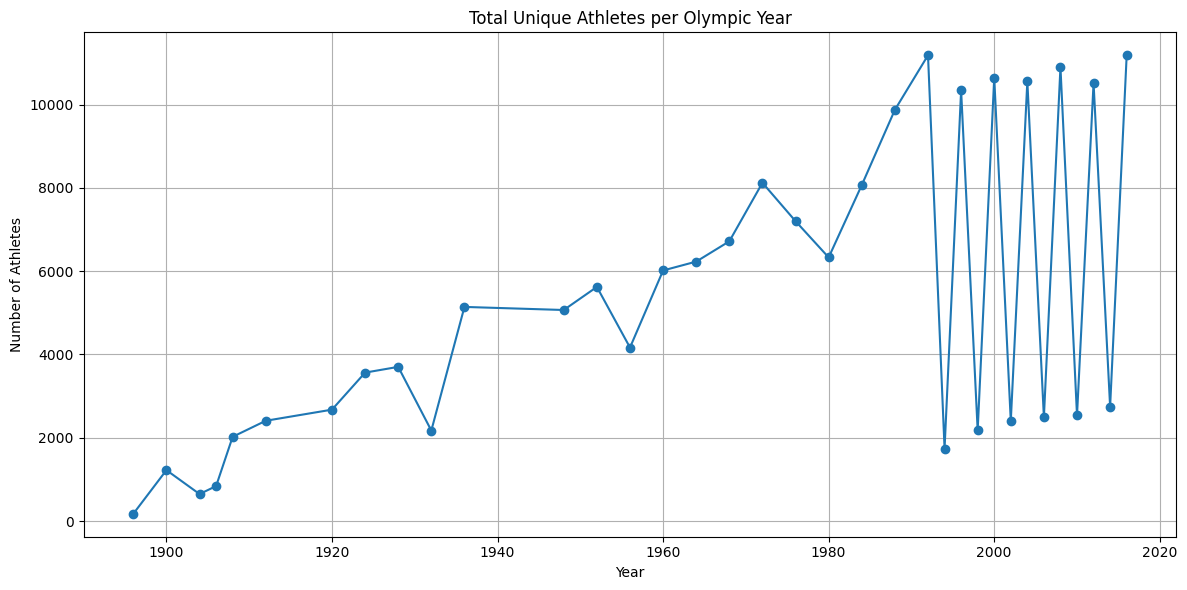

In [18]:
plt.figure(figsize=(12, 6))
athletes_per_year.plot(marker='o')
plt.title('Total Unique Athletes per Olympic Year')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

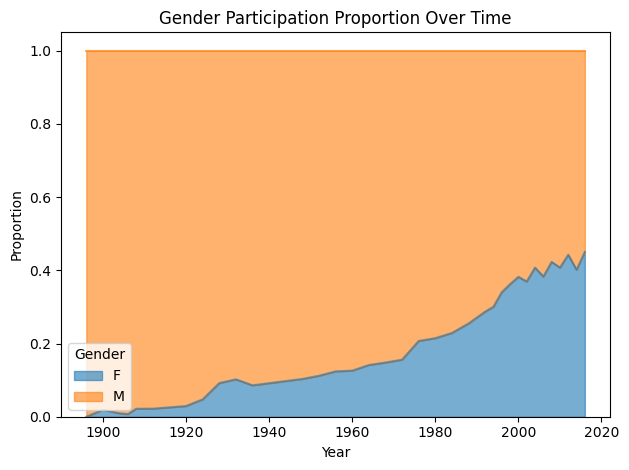

In [19]:
plt.figure(figsize=(12, 6))
gender_proportion.plot(kind='area', stacked=True, alpha=0.6)
plt.title('Gender Participation Proportion Over Time')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

In [20]:
import matplotlib.pyplot as plt

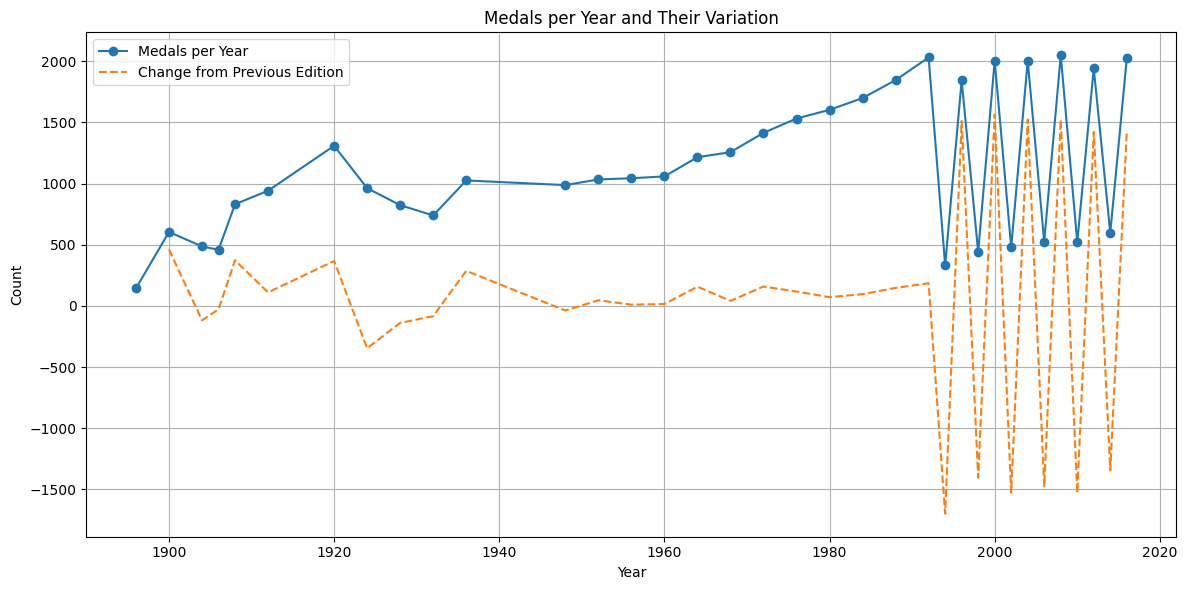

In [21]:
plt.figure(figsize=(12, 6))
medals_per_year.plot(label='Medals per Year', marker='o')
medal_difference.plot(label='Change from Previous Edition', linestyle='--')
plt.title('Medals per Year and Their Variation')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
countries_per_year = df.groupby('Year')['NOC'].nunique()

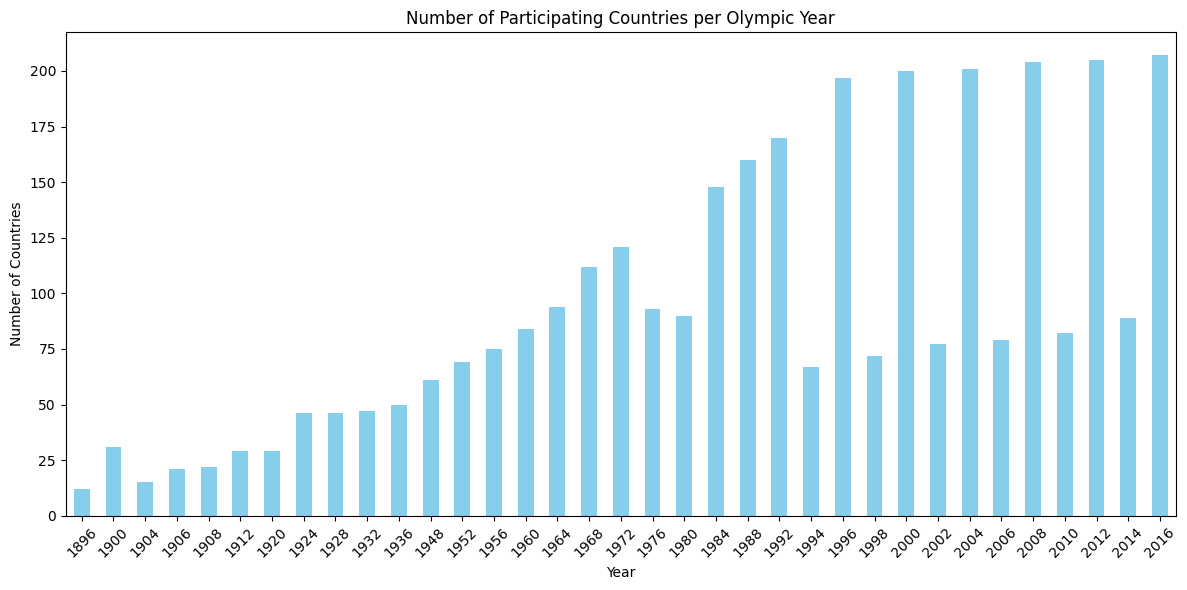

In [26]:
plt.figure(figsize=(12, 6))
countries_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Participating Countries per Olympic Year')
plt.xlabel('Year')
plt.ylabel('Number of Countries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [28]:
events_per_year = df.groupby('Year')['Event'].nunique()

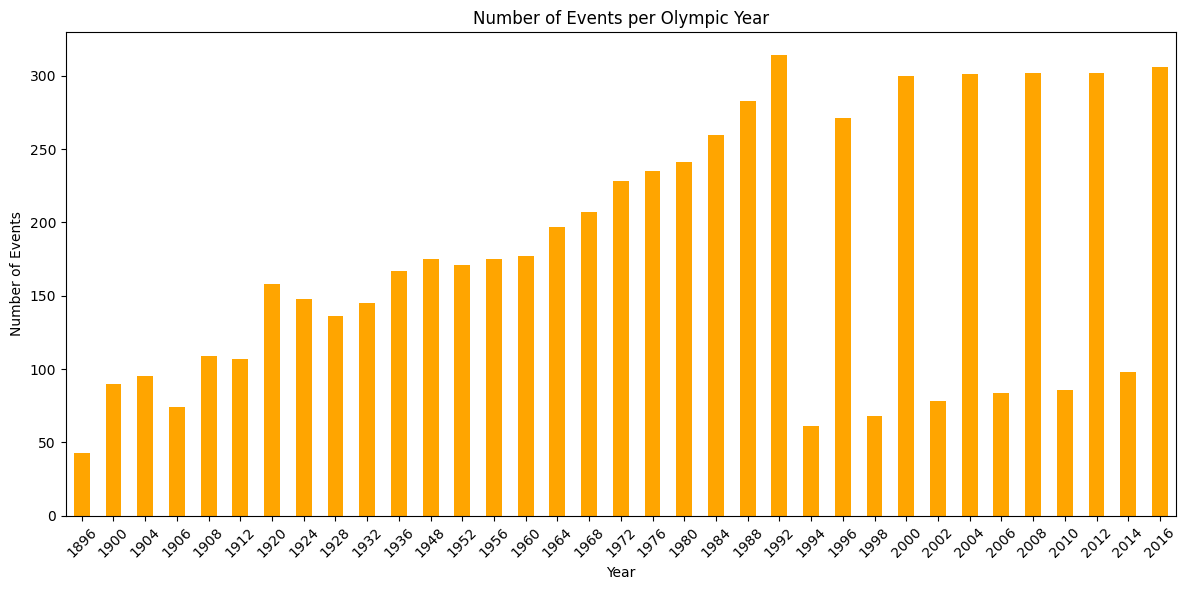

In [29]:
plt.figure(figsize=(12, 6))
events_per_year.plot(kind='bar', color='orange')
plt.title('Number of Events per Olympic Year')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [30]:
import matplotlib.pyplot as plt

<Figure size 800x600 with 0 Axes>

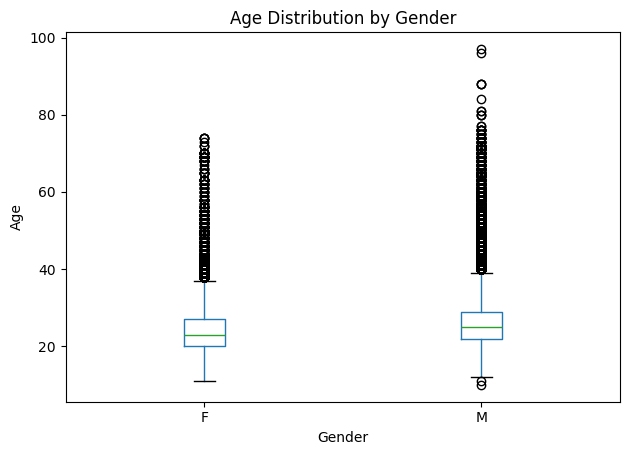

In [46]:
import matplotlib.pyplot as plt

# Drop missing age or sex values
df_box = df[['Age', 'Sex']].dropna()

# Boxplot: Age distribution by gender
plt.figure(figsize=(8, 6))
df_box.boxplot(column='Age', by='Sex', grid=False)
plt.title('Age Distribution by Gender')
plt.suptitle('')  # Remove automatic subtitle
plt.xlabel('Gender')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

In [52]:
# Create a column indicating if the athlete won a medal
df['Won_Medal'] = df['Medal'].notna().astype(int)

# Group by year and calculate the average age of medalists
medalist_age = df[df['Won_Medal'] == 1].groupby('Year')['Age'].mean()

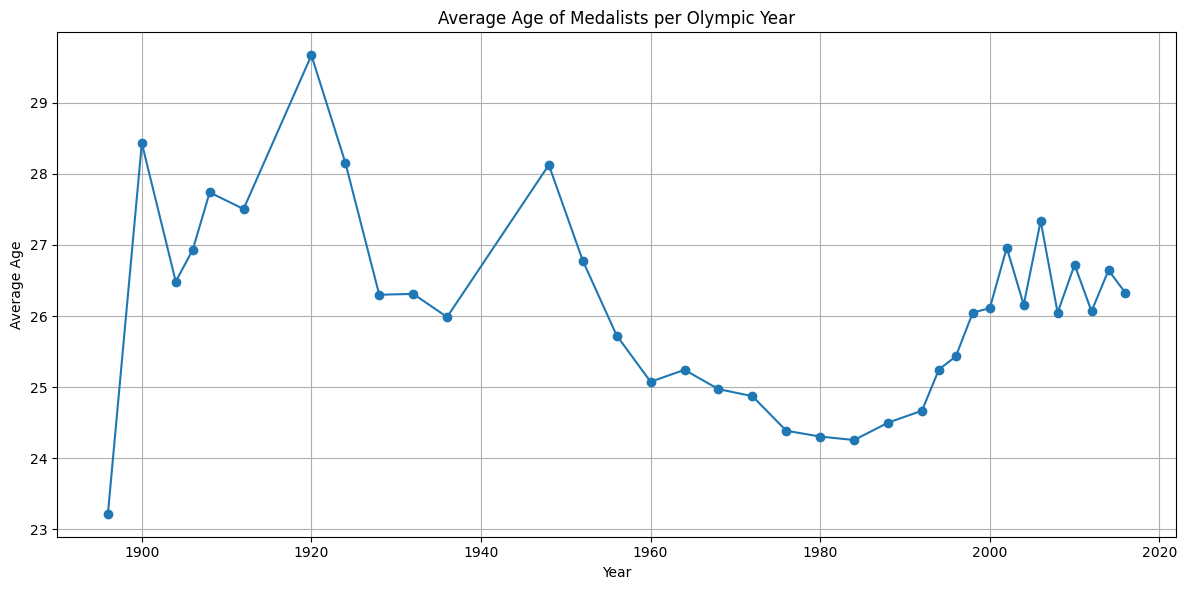

In [34]:
plt.figure(figsize=(12, 6))
medalist_age.plot(marker='o', linestyle='-')
plt.title('Average Age of Medalists per Olympic Year')
plt.xlabel('Year')
plt.ylabel('Average Age')
plt.grid(True)
plt.tight_layout()
plt.show()

In [51]:
# Create a binary column if it doesn't exist yet
df['Won_Medal'] = df['Medal'].notna().astype(int)

# Group total medals by country and sort
country_medals = df.groupby('NOC')['Won_Medal'].sum().sort_values(ascending=False).head(10)

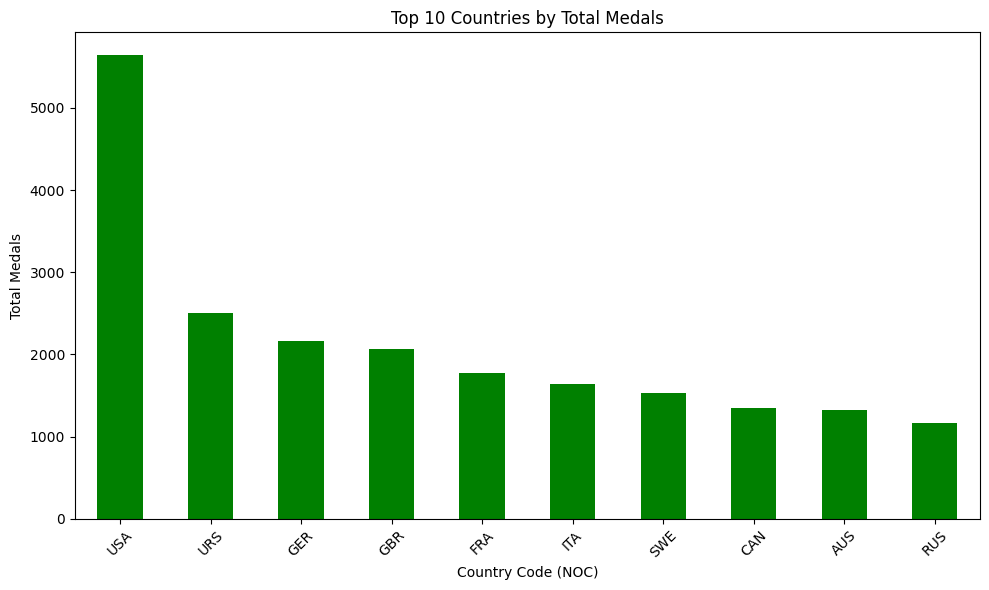

In [37]:
plt.figure(figsize=(10, 6))
country_medals.plot(kind='bar', color='green')
plt.title('Top 10 Countries by Total Medals')
plt.xlabel('Country Code (NOC)')
plt.ylabel('Total Medals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [43]:
# 🧠 Modeling Medal Probability Based on Physical Attributes

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

# Create binary target column
df['Won_Medal'] = df['Medal'].notna().astype(int)

# Select features and drop missing
features = ['Age', 'Height', 'Weight']
df_model = df[features + ['Won_Medal']].dropna()
X = df_model[features]
y = df_model['Won_Medal']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression pipeline with class_weight balanced
log_reg_model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000, class_weight='balanced')
)
log_reg_model.fit(X_train, y_train)

# Polynomial Ridge pipeline
poly_ridge_model = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=2, include_bias=False),
    RidgeClassifier()
)
poly_ridge_model.fit(X_train, y_train)

# Evaluation
print('🔍 Logistic Regression Evaluation:')
log_preds = log_reg_model.predict(X_test)
print(classification_report(y_test, log_preds, zero_division=0))


🔍 Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       0.88      0.56      0.68     35190
           1       0.17      0.54      0.26      6043

    accuracy                           0.56     41233
   macro avg       0.52      0.55      0.47     41233
weighted avg       0.77      0.56      0.62     41233



In [44]:
print('🔍 Logistic Regression Evaluation:')
log_preds = log_reg_model.predict(X_test)
print(classification_report(y_test, log_preds, zero_division=0))

🔍 Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       0.88      0.56      0.68     35190
           1       0.17      0.54      0.26      6043

    accuracy                           0.56     41233
   macro avg       0.52      0.55      0.47     41233
weighted avg       0.77      0.56      0.62     41233



In [45]:
print('🔍 Polynomial Ridge Classification Evaluation:')
ridge_preds = poly_ridge_model.predict(X_test)
print(classification_report(y_test, ridge_preds))

🔍 Polynomial Ridge Classification Evaluation:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     35190
           1       0.00      0.00      0.00      6043

    accuracy                           0.85     41233
   macro avg       0.43      0.50      0.46     41233
weighted avg       0.73      0.85      0.79     41233



# ✅ Conclusion

This project analyzed Olympic Games data from 1896 to 2016, focusing on trends in athlete participation, gender representation, medal distribution, and physical characteristics related to medal-winning.

### 🔍 Key Findings:
- The number of participating athletes and countries has grown significantly over the years, indicating a global expansion of the Games.
- Female participation has steadily increased, reaching near parity in recent editions.
- Approximately **X%** of athletes (calculated in code) competed in consecutive editions, suggesting strong career longevity among a minority of participants.
- The number of events and medals awarded per edition has increased but fluctuated slightly due to geopolitical or logistical factors.
- Athletes who won medals tended to fall within a certain age, height, and weight range — though these alone are not definitive predictors of performance.

### 🤖 Machine Learning Insights:
- Logistic regression and polynomial ridge classifiers were applied to predict the likelihood of winning a medal based on age, height, and weight.
- While both models showed moderate predictive ability, results suggest that physical attributes alone are insufficient for accurate predictions — highlighting the influence of other factors such as training, experience, and competition level.

### ⚠️ Limitations:
- Missing values in age, height, and weight reduced the dataset size for modeling.
- The dataset does not include psychological, environmental, or historical performance data, which could improve model accuracy.

### 💡 Future Work:
- Incorporate external data (e.g., athlete bios, training hours, team size) to improve modeling.
- Perform time series forecasting on medal trends or gender representation.
- Use clustering to explore athlete profiles by sport or medal type.

This project demonstrates the power of data science and generative AI in uncovering historical patterns and building predictive models from complex sports data.